## Intro: GB-AFS

#### GB-AFS offers users the option to use any combination of dimensionality reduction techniques with a separability metric. 
#### For more information, please see our documentation [here](https://davidlevinwork.github.io/gbfs/)).

#### In the following examples, we will demonstrate several initialization combinations of GB-AFS. 
#### As you will see below, each combination will produce a unique feature space.

In [3]:
from gbfs import GBAFS

%matplotlib inline

## Example 1: t-SNE + JM distance

### Step 1: Init a dimensionality reduction method

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10)

### Step 2: Init a GB-AFS object

In [5]:
gbafs = GBAFS(
    dataset_path='cardiotocography.csv',
    separability_metric='jm',
    dim_reducer_model=tsne,
)

### Step 3: Feature Selection

In [6]:
selected_features = gbafs.select_features()

print("Selected Feature Indices:", selected_features)

Selected Feature Indices: [6, 2, 1, 4, 9, 19, 0, 8, 15]


### Step 4 (opt.): Visualizing the Feature Space

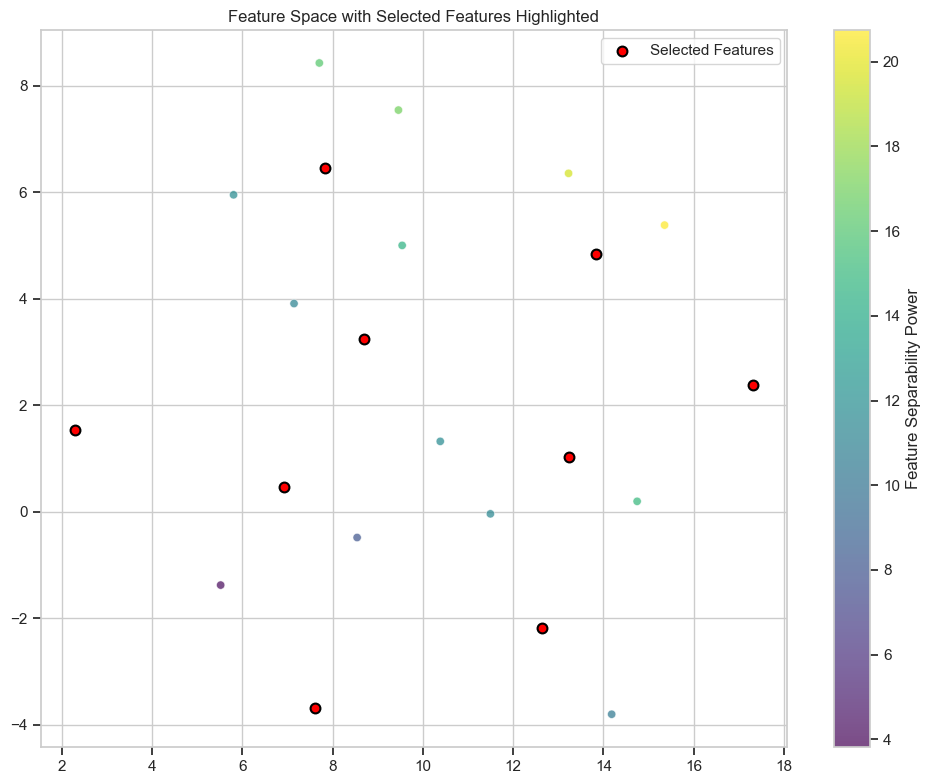

In [7]:
gbafs.plot_feature_space()

## Example 2: Isomap + Wasserstein distance

In [8]:
from sklearn.manifold import Isomap

isomap = Isomap()

In [9]:
gbafs = GBAFS(
    dataset_path='cardiotocography.csv',
    separability_metric='wasserstein',
    dim_reducer_model=isomap,
)

In [10]:
selected_features = gbafs.select_features()

print("Selected Feature Indices:", selected_features)

Selected Feature Indices: [0, 17, 2, 4, 13]


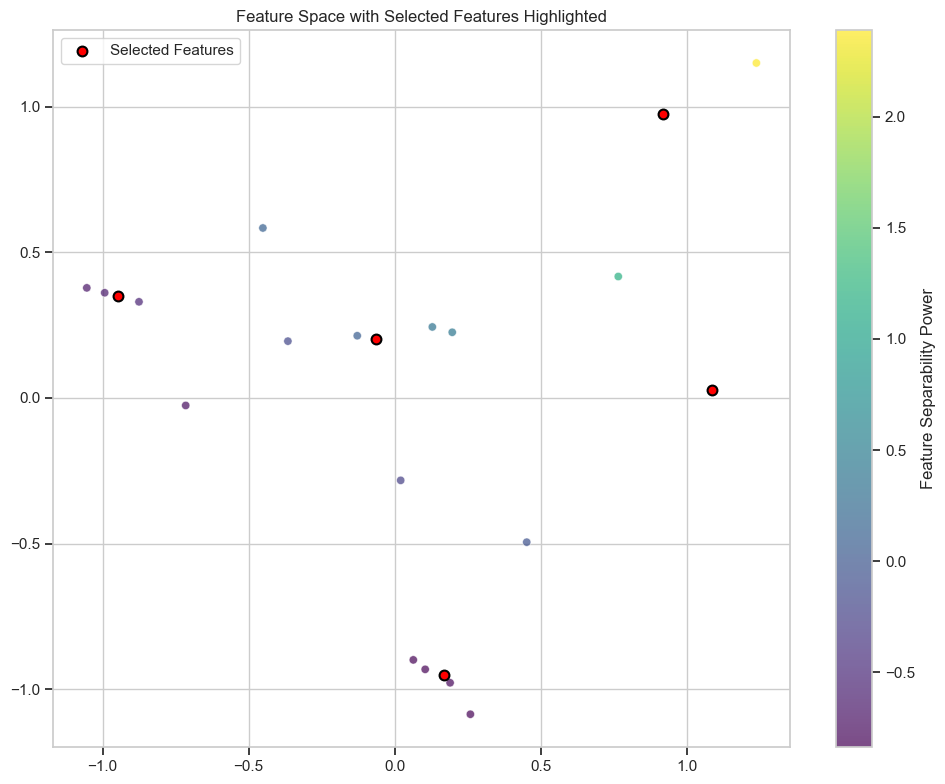

In [11]:
gbafs.plot_feature_space()

## Example 3: Umap + Bhattacharyya distance

In [16]:
import umap

umap = umap.UMAP()

In [13]:
gbafs = GBAFS(
    dataset_path='cardiotocography.csv',
    separability_metric='bhattacharyya',
    dim_reducer_model=umap,
)

In [14]:
selected_features = gbafs.select_features()

print("Selected Feature Indices:", selected_features)

Selected Feature Indices: [16, 11, 6, 2, 3, 19, 9]


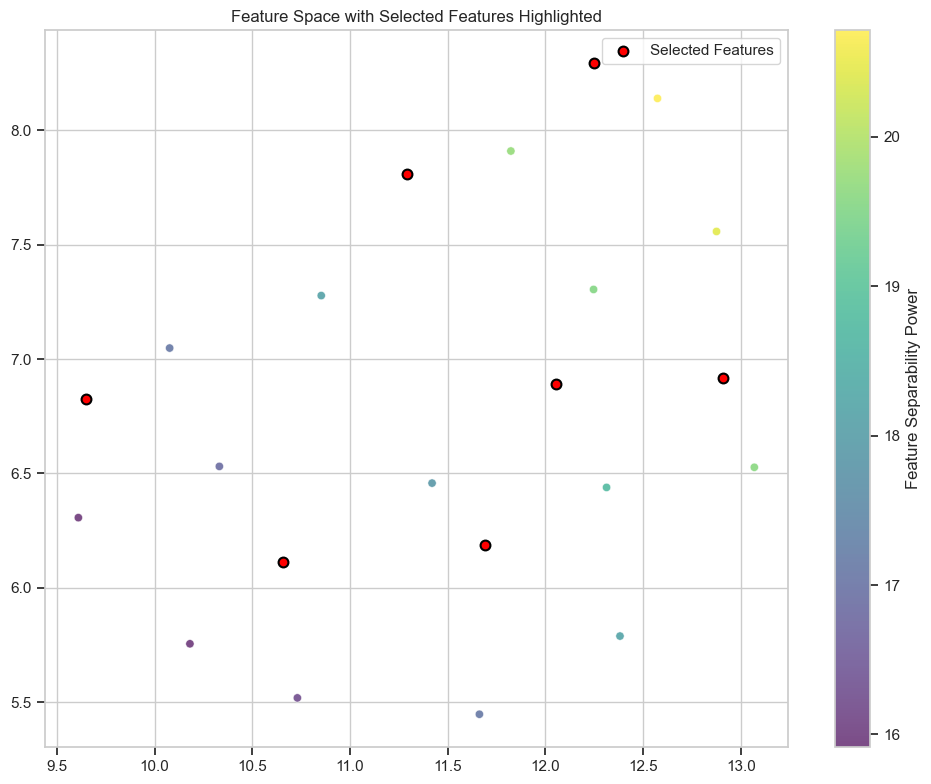

In [15]:
gbafs.plot_feature_space()

## GB-AFS Properites

In [18]:
# get the total number of features in the given dataset
gbafs.number_of_features

20

In [19]:
# get the knee value (= number of selected features)
gbafs.knee

7

In [20]:
# get the knee mss value
gbafs.mss_knee

0.69916147

In [21]:
# get the final selected features
gbafs.selected_features

array([16, 11,  6,  2,  3, 19,  9])

In [22]:
# get the location final selected features
gbafs.selected_features_loc

array([[11.69128  ,  6.1893272],
       [ 9.6514225,  6.825247 ],
       [12.907531 ,  6.91737  ],
       [12.054543 ,  6.8913355],
       [10.655549 ,  6.1123133],
       [11.294552 ,  7.806872 ],
       [12.248476 ,  8.293519 ]], dtype=float32)

In [23]:
# get the separation matrix (where for each feature, there's a score indicating the ability to differentiate between each pair of classes)
# num of rows = num of features
# num of cols = num of unique combinations of class pairs
gbafs.separation_matrix

array([[1.18558862e-03, 4.75681706e-02, 7.16994543e-03, 1.85200634e-01,
        3.51641789e-02, 1.62914329e-02, 8.45790522e-02, 2.06576415e-02,
        1.45204168e-01, 3.57404623e-02, 3.77821671e-03, 1.92321927e-01,
        2.43582064e-02, 8.93563851e-03, 7.01530763e-02, 2.49523524e-02,
        1.55296520e-01, 3.99943860e-02, 3.82931961e-01, 1.88934216e-03,
        2.08524462e-02, 6.86770740e-03, 1.13385243e-01, 3.37426129e-01,
        1.58496329e-01, 2.53298891e-02, 4.22006567e-03, 7.92409337e-02,
        1.94905472e-02, 1.29692841e-01, 3.21806027e-01, 2.04192610e-01,
        5.19755346e-01, 8.78751875e-02, 9.41123575e-03, 1.02507595e-02,
        1.58043732e-02, 8.83336136e-02, 2.83332201e-01, 5.14900905e-02,
        4.12743799e-02, 1.76325825e-01, 1.73247655e-01, 4.56954657e-01,
        5.59855135e-02],
       [1.07616656e+00, 3.84967310e-02, 1.96851595e+00, 4.08641049e-02,
        9.78076956e-01, 9.87479861e-03, 8.27809825e-02, 9.36868095e+00,
        2.09940813e-01, 1.28337753e+00,